In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
pitstops = pd.read_csv("data_raw/pit_stops.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
constructors = pd.read_csv("data_clean/constructors.csv")
results = pd.read_csv("data_clean/results.csv")
races = pd.read_csv("data_raw/races.csv")

In [3]:
# clean data 
pitstops.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

In [25]:
# clean results
results.dtypes
results["milliseconds"] = results["milliseconds"].replace(["\\N"], [np.nan])

In [ ]:
"""
Graph One
Columns needed:
- pit_stops table: num_pit stops

-- results: (link by driverId and raceId) constructorId, time
- constructors: (link by constructor) --> name

-- group by constructors, sort by year, find average of pit stops and time


"""

In [ ]:
# Graph One: pit stops by constructor by year
# need constructor_name (data point), avg_num_pit_stops (x-axis), position/pts (y-axis) 


# Graph Two: average time of pit stops over time
# Graph Three: number of pit stops vs. final time

In [7]:
g_one = pitstops.loc[pitstops.groupby(['raceId', 'driverId'], sort= True)['stop'].idxmax()][['raceId', 'driverId', 'stop']]

In [6]:
sort = pitstops.sort_values(by = ['driverId', 'raceId' ])
# check validity

In [35]:
temp = g_one

In [11]:
# rename stop to num_stops
g_one = g_one.rename(columns={'stop':'num_stops'})

In [26]:
g_one = pd.merge(g_one, results[['driverId', 'raceId','constructorId', 'milliseconds']], on=['raceId', 'driverId'], how='left')

In [34]:
# drop columns where drivers did not finish


In [27]:
g_one = pd.merge(g_one, constructors[['constructorId', 'name']], on='constructorId', how='left')

In [31]:
g_one['milliseconds'] = pd.to_numeric(g_one['milliseconds'])

In [49]:
temp = g_one.groupby(['constructorId', 'raceId'], as_index=True).agg({
    'name': 'first',
    'raceId': 'first',
    'num_stops':'mean',
    'milliseconds': 'mean', 
})



In [97]:
temp = g_one

In [99]:
g_two = g_one.groupby(['name', 'year'], as_index=True).agg({
    'name': 'first',
    'year': 'first',
    'num_stops':'mean',
    'milliseconds': 'mean', 
})

In [65]:
df = pd.read_csv('data_final/g_one_data.csv')
df.describe()

,constructorId,raceId,raceId.1,num_stops,milliseconds
count,1561.000000,1561.000000,1561.000000,1561.000000,1.561000e+03
mean,56.800769,966.971813,966.971813,2.095131,6.037321e+06
std,77.116067,76.961799,76.961799,0.952097,1.203749e+06
min,1.000000,841.000000,841.000000,1.000000,4.526665e+06
25%,5.000000,894.000000,894.000000,1.000000,5.435111e+06
50%,9.000000,967.000000,967.000000,2.000000,5.773158e+06
75%,131.000000,1035.000000,1035.000000,3.000000,6.193374e+06
max,214.000000,1096.000000,1096.000000,6.000000,1.472798e+07


In [84]:
g_one.dtypes

name             object
raceId            int64
num_stops       float64
milliseconds    float64
dtype: object

In [89]:
g_one.reset_index(drop=True, inplace=True)

In [90]:
# add year
g_one = pd.merge(g_one, races[['raceId', 'year']], on='raceId', how='left')

In [95]:
print(g_one["name"].unique())

['McLaren' 'Williams' 'Renault' 'Toro Rosso' 'Ferrari' 'Red Bull'
 'Force India' 'Sauber' 'Alfa Romeo' 'Aston Martin' 'Mercedes' 'HRT'
 'Lotus' 'Marussia' 'Caterham' 'Lotus F1' 'Manor Marussia' 'Haas F1 Team'
 'Racing Point' 'AlphaTauri' 'Alpine F1 Team']


In [105]:
import plotly.express as px
df = g_one

In [104]:
g_two.describe()

,year,num_stops,milliseconds
count,125.000000,125.000000,1.250000e+02
mean,2016.376000,2.164941,6.189404e+06
std,3.463319,0.443934,7.084595e+05
min,2011.000000,1.000000,5.512118e+06
25%,2013.000000,1.909091,5.885738e+06
50%,2016.000000,2.142857,6.056028e+06
75%,2019.000000,2.375000,6.339274e+06
max,2022.000000,3.500000,1.091449e+07


In [108]:

px.scatter(df, x="num_stops", y="milliseconds", animation_frame="name", animation_group="raceId",
           size="milliseconds", color="raceId", hover_name="year",
           range_x=[0, 7], range_y=[4500000, 15000000])

In [69]:
g = pd.read_csv("data_final/g_one_data.csv")
name = g['name']
stops = g['num_stops']
mil = g['milliseconds']




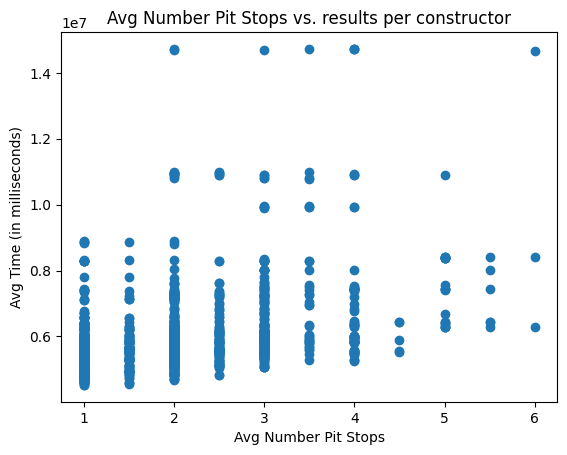

In [80]:

plt.scatter(stops, mil)

plt.title("Avg Number Pit Stops vs. results per constructor")
plt.xlabel("Avg Number Pit Stops")
plt.ylabel("Avg Time (in milliseconds)")
plt.show()


In [50]:
g_one = temp[['name', 'raceId', 'num_stops', 'milliseconds']]

In [48]:
temp = g_one

In [92]:
g_one.to_csv("data_final/g_one_data.csv")